# K Nearest Neighbors 
#### Introduction:
You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes.

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

#### Business Goal: 
According to our introduction part , we have the classified data as mentioned which tells us about the hidden features/columns name but we have the data and the target class, so our goal is to check for the classification specially using KNN, which the confusion matrix and the classification report including the factors like precision recall, accuracy, f1-score,support etc.
So, that with the help of these factors we can check ,how our KNN model is working with the datasets we have been provided with. In short, How our KNN classifier is working with the classified dataset.


##### Basic Workflow of our Model is as follows:
- 1) --- Loading/Reading the Dataset
- 2) --- Data Preprocessing and Analysis
- 3) --- Standardization of the Variables
- 4) --- Train - Test Split
- 5) --- Using KNN- K Nearest Neighbors Classifier
- 6) --- Predictions and Evaluation
- 7) --- Choosing the K value
- 8) --- Cross Validation
- 9) --- Conclusion

### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading/Reading  the Dataset

In [2]:
df = pd.read_csv('Classified Data')

In [3]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Data Preprocessing and Analysis

In [4]:
df.shape

(1000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


##### Checking for the Missing Values

In [6]:
df.isnull().sum()

Unnamed: 0      0
WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

##### Statical Analysis of the dataset

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,499.500000,288.819436,0.000000,249.750000,499.500000,749.250000,999.000000
WTT,1000.0,0.949682,0.289635,0.174412,0.742358,0.940475,1.163295,1.721779
PTI,1000.0,1.114303,0.257085,0.441398,0.942071,1.118486,1.307904,1.833757
EQW,1000.0,0.834127,0.291554,0.170924,0.615451,0.813264,1.028340,1.722725
SBI,1000.0,0.682099,0.229645,0.045027,0.515010,0.676835,0.834317,1.634884
LQE,1000.0,1.032336,0.243413,0.315307,0.870855,1.035824,1.198270,1.650050
QWG,1000.0,0.943534,0.256121,0.262389,0.761064,0.941502,1.123060,1.666902
FDJ,1000.0,0.963422,0.255118,0.295228,0.784407,0.945333,1.134852,1.713342
PJF,1000.0,1.071960,0.288982,0.299476,0.866306,1.065500,1.283156,1.785420
HQE,1000.0,1.158251,0.293738,0.365157,0.934340,1.165556,1.383173,1.885690


<AxesSubplot:>

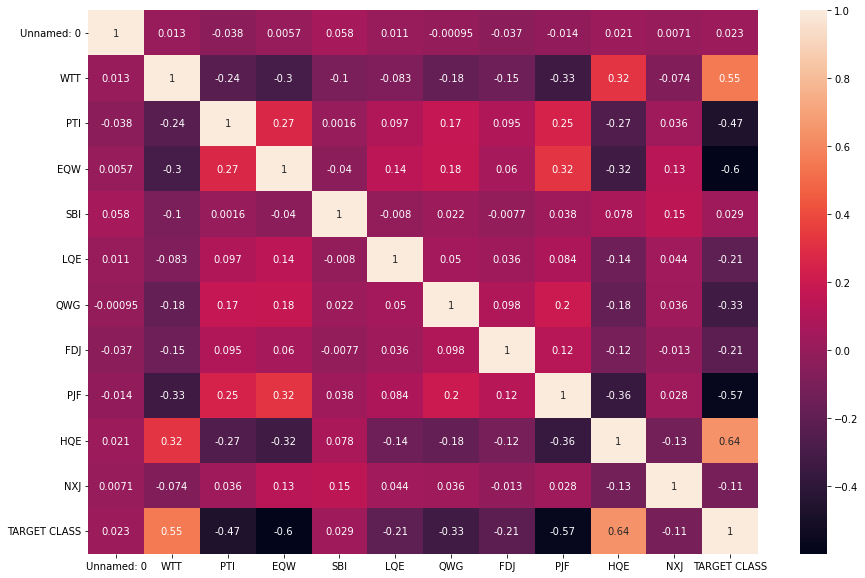

In [8]:
plt.figure(figsize = (15,10)) #getting a visual of our data
sns.heatmap(df.corr(),annot = True)

As we can see we have many varying values in our data.
Even though we cannot correlate any column with the other, lets try to plot the other trend from the dataset provided.

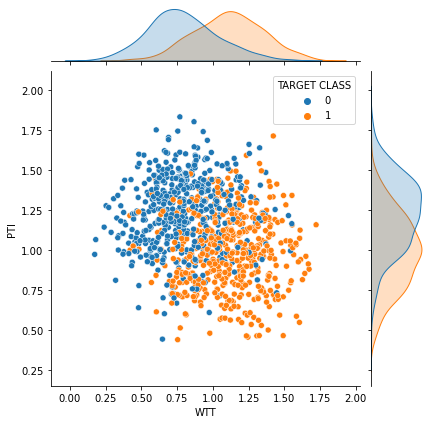

In [9]:
sns.jointplot(x='WTT',y='PTI',data = df,hue='TARGET CLASS',kind='scatter')

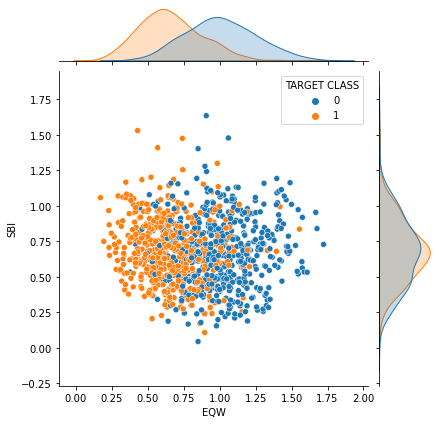

In [10]:
sns.jointplot(x='EQW',y='SBI',data = df,hue='TARGET CLASS',kind='scatter')

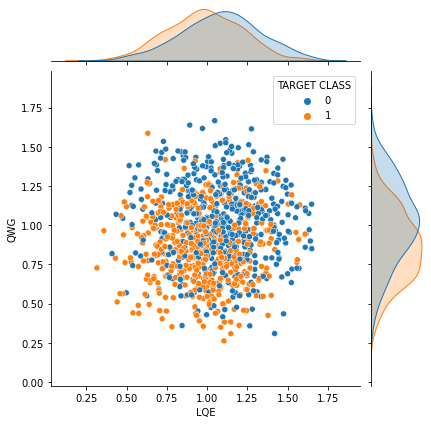

In [11]:
sns.jointplot(x='LQE',y='QWG',data = df,hue='TARGET CLASS',kind='scatter')

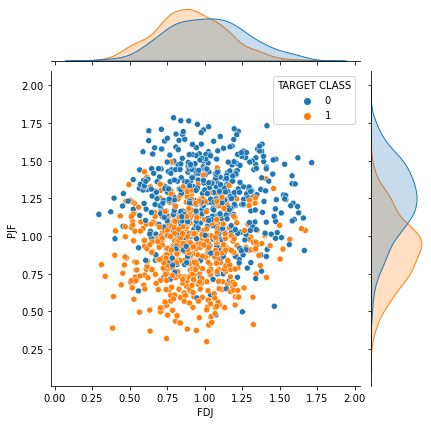

In [12]:
sns.jointplot(x='FDJ',y='PJF',data = df,hue='TARGET CLASS',kind='scatter')

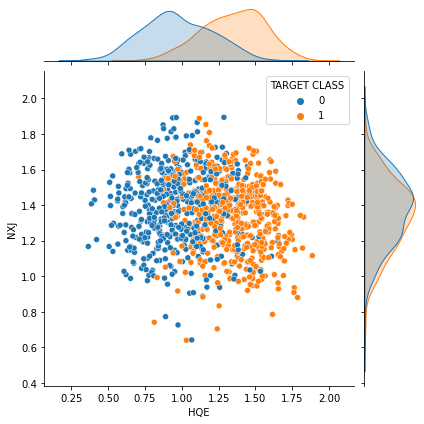

In [13]:
sns.jointplot(x='HQE',y='NXJ',data = df,hue='TARGET CLASS',kind='scatter')

From the plots we can say that all of our data lies between 0 and 2. We have no negative values in our data.We couldn't deduce much from the data that we have but we can get a few insights from such data just by plotting a few graphs and maybe even the sector in which the company works can help you correlate the data that is given to you. So lets start working on our model.

### Standardize the Variables
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
df1 = scaler.fit_transform(df.drop('TARGET CLASS',axis = 1))
df1

array([[-1.73031962, -0.12354188,  0.18590747, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -0.43034845, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.33931821, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142,  0.64177714, -0.51308341, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -0.98278576, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -0.59589427, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [17]:
col = df.drop('TARGET CLASS',axis = 1).columns
df1_scale = pd.DataFrame(df1,columns=col)

##### Let's compare both the data- (original and the Standardize)

In [18]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [19]:
df1_scale.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [20]:
df1_std=df1_scale.drop('Unnamed: 0',axis= 1)

In [21]:
df1_std.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


##### Statistical Analysis for the Standardize data:

In [22]:
df1_std.describe().T

,count,mean,std,min,25%,50%,75%,max
WTT,1000.0,1.141309e-16,1.0005,-2.678050,-0.716168,-0.031802,0.737894,2.667092
PTI,1000.0,-3.198553e-16,1.0005,-2.618747,-0.670276,0.016281,0.753441,2.799904
EQW,1000.0,-1.181277e-16,1.0005,-2.275858,-0.750410,-0.071593,0.666465,3.049325
SBI,1000.0,-1.766365e-16,1.0005,-2.775551,-0.727963,-0.022937,0.663169,4.151021
LQE,1000.0,-6.170064e-16,1.0005,-2.947206,-0.663736,0.014337,0.682037,2.538987
QWG,1000.0,2.531308e-17,1.0005,-2.660802,-0.712797,-0.007940,0.701293,2.825739
FDJ,1000.0,2.317035e-16,1.0005,-2.620466,-0.702047,-0.070939,0.672300,2.940974
PJF,1000.0,-4.826139e-16,1.0005,-2.674465,-0.712010,-0.022366,0.731191,2.470109
HQE,1000.0,3.438916e-16,1.0005,-2.701361,-0.762663,0.024883,0.766109,2.477734
NXJ,1000.0,4.525824e-16,1.0005,-3.542140,-0.686361,0.061940,0.696185,2.602476


####  Splitting the data into train and test data:

In [23]:
x= df1_std
y= df['TARGET CLASS']

In [24]:
x.shape

(1000, 10)

In [25]:
y.shape

(1000,)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.2,random_state=42)

In [28]:
print('Shape of x_train is: ',x_train.shape)
print('Shape of x_test is: ',x_test.shape)
print('Shape of y_train is: ',y_train.shape)
print('Shape of y_test is: ',y_test.shape)

Shape of x_train is:  (800, 10)
Shape of x_test is:  (200, 10)
Shape of y_train is:  (800,)
Shape of y_test is:  (200,)


# 

# Using KNN
we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn= KNeighborsClassifier(n_neighbors=1)

In [31]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [32]:
pred = knn.predict(x_test)

In [33]:
pred.shape

(200,)

### Predictions and Evaluations
Let's Predict and Evaluate our KNN Model.

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print('\n Confusion Matrix \n\n',confusion_matrix(y_test,pred))
print('=========================================================')
print('\n Classification Report \n\n',classification_report(y_test,pred))


 Confusion Matrix 

 [[91  7]
 [ 4 98]]

 Classification Report 

               precision    recall  f1-score   support

           0       0.96      0.93      0.94        98
           1       0.93      0.96      0.95       102

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



### Choosing the K- Value:

###### Using an Elbow method to pick good K-value

In [36]:
# Lets create an empty list for the error_rate
error_rate= []

In [37]:
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

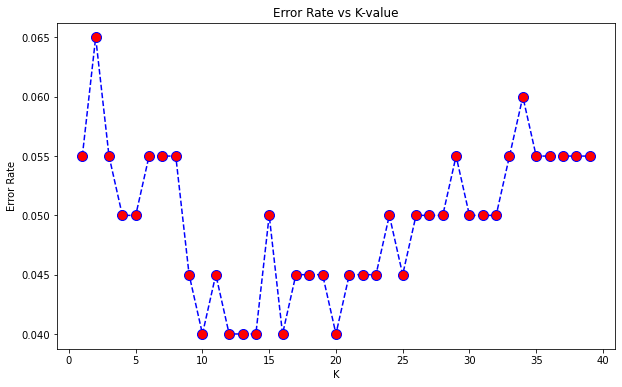

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after around K which is approx. 20, the error rate just tends to hover around 0.05-0.04 Let's retrain the model with that and check the classification report.

##### Let's compare for k = 1 and k = 20

In [39]:
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print('\n\nWith K = 1')
print('\n')
print('\n Confusion Matrix \n\n',confusion_matrix(y_test,pred))
print('=========================================================')
print('\n Classification Report \n\n',classification_report(y_test,pred))



With K = 1



 Confusion Matrix 

 [[91  7]
 [ 4 98]]

 Classification Report 

               precision    recall  f1-score   support

           0       0.96      0.93      0.94        98
           1       0.93      0.96      0.95       102

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



In [40]:
knn = KNeighborsClassifier(n_neighbors= 20)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print('\n\nWith K = 20')
print('\n')
print('\n Confusion Matrix \n\n',confusion_matrix(y_test,pred))
print('=========================================================')
print('\n Classification Report \n\n',classification_report(y_test,pred))



With K = 20



 Confusion Matrix 

 [[95  3]
 [ 5 97]]

 Classification Report 

               precision    recall  f1-score   support

           0       0.95      0.97      0.96        98
           1       0.97      0.95      0.96       102

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



After retraining our model with k=25, we can see that our False Negative and False positive rates has been decreased as compared to k = 1, Thus we can go and check for any values which are more than k= 25 till 40 as we have selected the range till 40, to get more exact and which can lead to more decreased rates of FP and FN in the confusion matrix.
Also our f1-score in the classification report is almost near to 1, which means more the value near to 1, more the accuracy rate will be or more accurate our model will be.

### Cross validation

Definition : Cross-validation is a technique for validating the model efficiency by training it on the subset of input data and testing on previously unseen subset of the input data. We can also say that it is a technique to check how a statistical model generalizes to an independent dataset.

Now let's move forward with Cross Validation by chechking the accuracy rate ,with croos validation score = 10

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
accuracy_rate = []

In [43]:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn, df1_std, df['TARGET CLASS'],cv= 10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

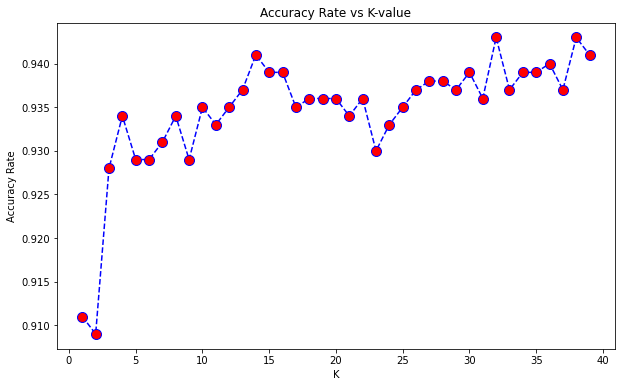

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy Rate vs K-value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

So, After the cross validation, we get the accuracy score of approximtely 96%,which means our model is working quite well with the dataset we have been provided with. So this was all about the KNN clustering of our Classified Dataset.